# Random symmetric QUBO matrix

In [3]:
import matplotlib.pyplot as plt
from qubo_divided import solve_qubo_by_dividing


import numpy as np

import itertools


d = 3

A, B, C, D, E, F = 5, 4, 2, 3, 1, 0


Q = np.array([  [ A, B, C], 
                [ B, D, E],
                [ C, E, F]])
#2 * np.random.rand(d, d) - 1

# 

parity: 0
Mean energies -6.0
Mean energies -6.0
Mean energies -6.0
Mean energies -12.0
Mean energies 2.0
Mean energies -2.0
Mean energies -8.0
Mean energies 4.0
Mean energies 6.0
Mean energies -2.0
Mean energies 2.0
Mean energies 2.0
Mean energies 2.0
Mean energies -2.0
Mean energies 0.0
Mean energies 0.0
Mean energies -8.0
Mean energies -2.0
Mean energies -6.0
Mean energies 16.0
Mean energies 0.0
Mean energies -6.0
Mean energies 2.0
Mean energies -6.0
Mean energies 6.0
Mean energies -8.0
Mean energies -8.0
Mean energies 4.0
Mean energies -6.0
Mean energies 2.0
Mean energies -6.0
Mean energies 4.0
Mean energies -8.0
Mean energies 2.0
Mean energies 6.0
Mean energies -4.0
Mean energies -6.0
Mean energies 4.0
Mean energies 2.0
Mean energies -12.0
Mean energies -2.0
Mean energies 4.0
Mean energies 2.0
Mean energies 0.0
Mean energies -2.0
Mean energies -4.0
Mean energies 0.0
Mean energies -8.0
Mean energies 6.0
Mean energies 6.0
Mean energies 12.0
Mean energies -12.0
Mean energies -8.0
Mean

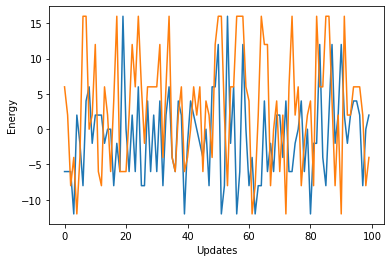

[[ 0  4 -2 -4  2  0]
 [ 4 -4  4  0  4 -4]
 [-2  4 -2  4  0 -2]
 [-4  0  4 -4  4  4]
 [ 2  4  0  4 -6  2]
 [ 0 -4 -2  4  2  0]]
Algo: -12 [1, 0, 0, 1, 0, 0]
Exact solution: (-12, array([0, 1, 0, 0, 0, 1]))


In [14]:
Q = np.array(  [[ 0, 4,-2,-4, 2, 0],
                [ 4,-4, 4, 0, 4,-4],
                [-2, 4,-2, 4, 0,-2],
                [-4, 0, 4,-4, 4, 4],
                [ 2, 4, 0, 4,-6, 2],
                [ 0,-4,-2, 4, 2, 0]])

d = 6

min_energy, min_bistring = solve_qubo_by_dividing(
    Q,
    learning_rate=0.1,
    shots=1,
    updates=100,
    d_per_computer=d,
)

print(Q)
print("Algo:", min_energy, min_bistring)


def calculate_QUBO_explicitely(Q):
    d = len(Q)

    bitstrings = list(map(np.array, list(itertools.product([0, 1], repeat=d))))

    values = []

    for bitstring in bitstrings:
        values.append(bitstring @ Q @ bitstring)

    return min(values), bitstrings[np.argmin(values)]


print("Exact solution:", calculate_QUBO_explicitely(Q))

In [15]:
d = 6

bitstrings = list(map(np.array, list(itertools.product([0, 1], repeat=d))))

values = []

for bitstring in bitstrings:
    values.append(bitstring @ Q @ bitstring)


In [16]:
np.where( values == min(values) )

(array([17, 36]),)

In [19]:
timetable = np.array([[2,3,4,2,3,4],
                      [1,4,3,1,4,3],
                      [4,1,2,4,1,2],
                      [3,2,1,3,2,1]])
z = bitstrings[17]

In [21]:
str(1) in ["1", "2", "3"]

True

{'12': 0, '13': 1, '14': 0, '23': 0, '24': 0, '34': 1}

In [57]:
z

array([0, 1, 0, 0, 0, 1])

In [59]:
ha_assignment = np.ones_like(timetable) * -1   # -1 for debug
num_games = 2* (num_teams-1)
for t_row in range( num_teams ):
    for slot in range( num_games ):
        team_1 = t_row + 1
        team_2 = timetable[t_row, slot]

        #print(team_1, team_2)
        if team_1 > team_2:
            team_1, team_2 = team_2, team_1     # slot is in the second half of the tournament team1 is greater than team2, switch them
            label = str(team_1) + str(team_2)   # create label for lookup

            if slot >= num_teams - 1:     # slot is in the second half of the tournament
                a = z_labeled[ label ]  # 'a' is the 1 or 0 home assignment value
            
            else:                       # slot is in the first half of the tournament
                a = 1 - z_labeled[ label ]


        else:
            label = str(team_1) + str(team_2) 
            
            if slot >= num_teams - 1:
                a = 1 - z_labeled[ label ]
            
            else:
                a = z_labeled[ label ]
        
        ha_assignment[t_row, slot] = a #!

array([[0, 1, 0, 1, 0, 1],
       [1, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 1, 0],
       [0, 1, 1, 1, 0, 0]])

In [66]:
q = ha_assignment

breaks = 0
for t_row in range(q.shape[0]):
    for slot in range(q.shape[1]-1):
        breaks += q[t_row, slot] * q[t_row, slot + 1] + (1 - q[t_row,slot]) * ( 1 - q[t_row, slot + 1])


6

In [72]:
def setup_labels(z, num_teams):
    combos = []

    for i in range(1, num_teams ):
        for j in range(i, num_teams + 1):
            if i != j:
                combos.append( str(i) + str(j) )
    return dict( zip(combos, z ) )

In [76]:
def ha_assign(timetable, z):

    
    ha_assignment = np.ones_like(timetable) * -1   # -1 for debug
    num_teams = timetable.shape[0]
    num_games = 2 * (num_teams-1)

    z_labeled = setup_labels(z, num_teams)      # 
    
    for t_row in range( num_teams ):
        for slot in range( num_games ):
            team_1 = t_row + 1
            team_2 = timetable[t_row, slot]

            #print(team_1, team_2)
            if team_1 > team_2:
                team_1, team_2 = team_2, team_1     # slot is in the second half of the tournament team1 is greater than team2, switch them
                label = str(team_1) + str(team_2)   # create label for lookup

                if slot >= num_teams - 1:     # slot is in the second half of the tournament
                    a = z_labeled[ label ]  # 'a' is the 1 or 0 home assignment value
                
                else:                       # slot is in the first half of the tournament
                    a = 1 - z_labeled[ label ]


            else:
                label = str(team_1) + str(team_2) 
                
                if slot >= num_teams - 1:
                    a = 1 - z_labeled[ label ]
                
                else:
                    a = z_labeled[ label ]
            
            ha_assignment[t_row, slot] = a #!

    return ha_assignment

In [77]:
def count_breaks(timetable, z):
    ha = ha_assign(timetable, z)

    breaks = 0
    for t_row in range(ha.shape[0]):
        for slot in range(ha.shape[1]-1):
            breaks += ha[t_row, slot] * ha[t_row, slot + 1] + (1 - ha[t_row,slot]) * ( 1 - ha[t_row, slot + 1])

    return breaks

In [80]:
breaks_list = []
for  z in bitstrings:
    breaks_list.append( count_breaks(timetable, z) )



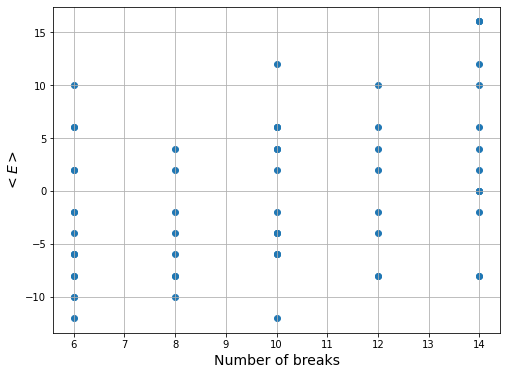

In [108]:
plt.figure(figsize=[8,6])
plt.grid()
plt.scatter( breaks_list, values )
plt.xlabel("Number of breaks", size = 14)
plt.ylabel("$<E>$", size = 14)
plt.savefig("/home/user/mnt/project/src/energy-breaks.png", dpi = 200)

In [102]:
np.where( np.array(breaks_list) == min(breaks_list) )

(array([12, 13, 17, 18, 19, 21, 25, 29, 34, 38, 42, 44, 45, 46, 50, 51]),)

In [100]:
max(breaks_list)

14

In [101]:
breaks_list[19], bitstrings[19]

(6, array([0, 1, 0, 0, 1, 1]))